# Theory
1. Problem: Estimate why do cactai grow in the parts of the desert. We don't really know what distinguishes high and low growth clusters. What is the ML system most suitable for the problem?

We need to use non-supervised learning to estimate clusters. 

2. How can the lack of validation set create a bias in the fit measurement?

If we do not use validation and jump from training to testing this may result in over-testing where we find the model that fits peculiarities of testing data.

3. How can we reduce overfitting?

Simplify the model, add more data, drop model restriction.

# Practice

In [4]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url,filename)

In [ ]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")


In [ ]:
#1. Load dataset oecd_bli
import os
import pandas as pd
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator  Air pollution  Assault rate  ...  Water quality  Years in education
Country                                 ...                                   
Australia           13.0           2.1  ...           91.0                19.4
Austria             27.0           3.4  ...           94.0                17.0

[2 rows x 24 columns]

1 Plot the relationship Linear model predicting Homicide rate with 'Educational Attaintment' and 'Life satisfaction' to the propostion: "...in much wisdom is much grief, and he who increases knowledge increases sorrow." Use a scatter plot: y='Life satisfaction', x='Educational attainment'

 2 Estimate and report relationship Linear model predicting 'Life satisfaction'  using 'Educational attainment'.

3 Plot regression line and scatter plot together. Does the greated eduction is correlation with greated life satisfaction?




4 Drop all Scandinavian countries: ['Denmark', 'Estonia', 'Finland', 'Norway', 'Iceland'] and re-estimate the relationship between life_satisfcation and educational attainment. How did the results change? 

In [ ]:
NoScanCountries.index

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czech Republic', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'OECD - Total', 'Poland', 'Portugal',
       'Russia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States'],
      dtype='object', name='Country')

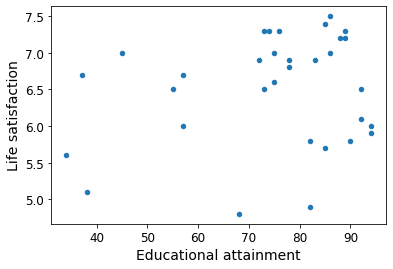

5 Plot regression lines for all countries and countries without Scandinavia

1.   List item
2.   List item



In [2]:
# Plot regression lines for all countries and countries without Scanfinavia


6. Load Boston. Dataset description is here: https://scikit-learn.org/stable/datasets/index.html#boston-dataset

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
# load libraries
from sklearn.datasets import load_boston
import pandas as pd
import random
# set random seed to get consistent results
random.seed(123)
np.random.seed(123) 
# Load Boston citi price data 
X, y = load_boston(return_X_y=True)
df = pd.DataFrame(data=X,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSAT'])
# create random indicator for pipeline
group_of_items = ['Good', 'Bad', 'Terrible', 'Excellient']           
df['QLTY'] = np.random.choice(group_of_items, len(df), p=[0.5, 0.1, 0.1, 0.3])
df_full = df.copy()
# Randomly delete observations for imputation
for i in range(0,13):
  c = df.columns[i]
  df.loc[df.sample(frac=0.1).index, c] = None
df_miss = df

Create a pipeline that will:
- create binary indicator for QLTY
- Impute all missing variables based on means
- Scale all number data to using Standard scalar

Be careful not to scale categorical data: cat = ['CHAS', 'RAD', 'QLTY']
To impute categorical variables use  SimpleImputer(strategy='most_frequent')

CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSAT        QLTY
0    0.00632  18.0   2.31   0.0  ...     15.3  396.90  4.98    Terrible
1    0.02731   0.0   7.07   0.0  ...     17.8  396.90  9.14        Good
2    0.02729   0.0   7.07   0.0  ...     17.8  392.83  4.03        Good
3    0.03237   0.0   2.18   0.0  ...     18.7  394.63  2.94         Bad
4    0.06905   0.0   2.18   0.0  ...     18.7  396.90  5.33  Excellient
..       ...   ...    ...   ...  ...      ...     ...   ...         ...
501  0.06263   0.0  11.93   0.0  ...     21.0  391.99  9.67        Good
502  0.04527   0.0  11.93   0.0  ...     21.0  396.90  9.08  Excellient
503  0.06076   0.0  11.93   0.0  ...     21.0  396.90  5.64        Good
504  0.10959   0.0  11.93   0.0  ...     21.0  393.45  6.48  Excellient
505  0.04741   0.0  11.93   0.0  ...     21.0  396.90  7.88        Good

[506 rows x 14 columns]

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
# WE can also impute the missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
from sklearn.preprocessing import OneHotEncoder


7. Estimate linear regression predicting MEDV using  full data and imputed data: df_full_prepared, df_prepared. Report ther resulting RMSEs

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
